# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [2]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

In [3]:
# scrape the names of the items on the webpage above
from bs4 import BeautifulSoup
import requests
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

In [4]:
warning = soup.find('div', class_="search-result-content")

In [5]:
items = warning.findAll('h3')

In [6]:
# load the data into a dataframe file
import pandas as pd
df = pd.DataFrame([items]).transpose()
df.columns = ['items']
df

,items
0,[Greenies Regular Dental Dog Treats]
1,[Greenies Teenie Dental Dog Treats]
2,[Greenies Large Dental Dog Treats]
3,"[Authority, [®], Dental & DHA Stick Puppy Tre..."
4,[Greenies Petite Dental Dog Treats]
5,[WHIMZEES Brushzees Dental Dog Treat - Natural...
6,[Pedigree Dentastix Triple Action Dental Dog T...
7,[Pedigree Dentastix Large Dog Treats]
8,[Pedigree Dentastix Large Dog Sticks]
9,"[Authority, [®], Dental & DHA Rings Puppy Tre..."


In [7]:
# save the data as a csv file
df.to_csv('data/part1.csv', index=False)

In [8]:
# display df.head()
df.head()

,items
0,[Greenies Regular Dental Dog Treats]
1,[Greenies Teenie Dental Dog Treats]
2,[Greenies Large Dental Dog Treats]
3,"[Authority, [®], Dental & DHA Stick Puppy Tre..."
4,[Greenies Petite Dental Dog Treats]


# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [9]:
# load in the dataframe, notice it only contains columns salaries, NPS Score, eventOutcome
import pandas as pd
df2 = pd.read_csv('data/part2.csv')
df2.head()

,salaries,NPS Score,eventOutcome
0,44112.0,-7.0,1
1,46777.0,-12.0,2
2,50013.0,50.0,5
3,48983.0,-13.0,0
4,50751.0,-11.0,6


In [10]:
import numpy as np
def zscores(arr):
    mean = arr.mean()
    std = arr.std()
    zscores = [(x - mean) / std for x in arr]
    return zscores

In [11]:
# calculate the zscore for each column and store them as a new column with the names used above
df2['salaries_zscores'] = zscores(df2['salaries'])
df2['NPS Score_zscores'] = zscores(df2['NPS Score'])
df2['eventOutcome_zscores'] = zscores(df2['eventOutcome'])
df2.head()

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS Score_zscores,eventOutcome_zscores
0,44112.0,-7.0,1,-1.460155,-0.913522,-1.103166
1,46777.0,-12.0,2,-0.793981,-1.080668,-0.668095
2,50013.0,50.0,5,0.014926,0.991947,0.637118
3,48983.0,-13.0,0,-0.242545,-1.114097,-1.538237
4,50751.0,-11.0,6,0.199405,-1.047239,1.072189


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

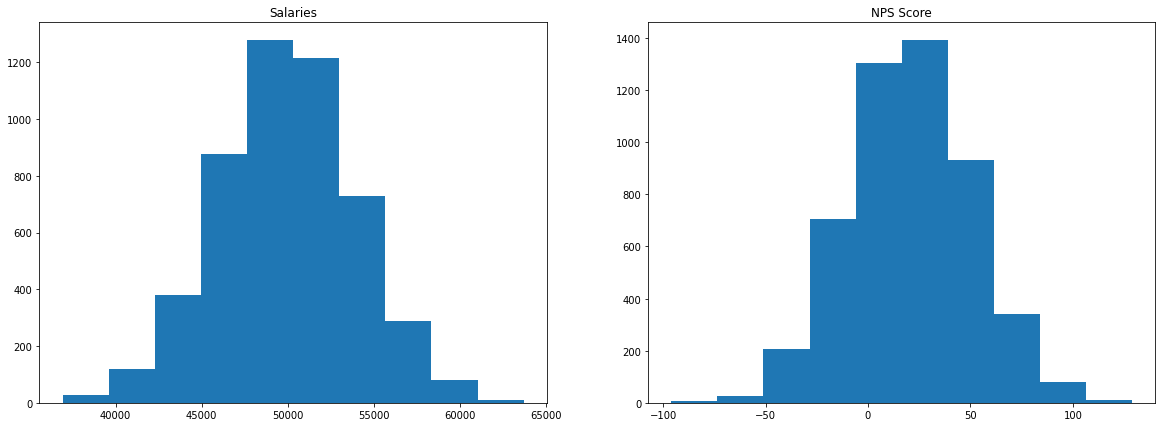

In [12]:
# plot for raw salaries and NPS Score data goes here
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.hist(df2['salaries'])
ax2.hist(df2['NPS Score'])
ax1.set_title('Salaries')
ax2.set_title('NPS Score')
plt.show()

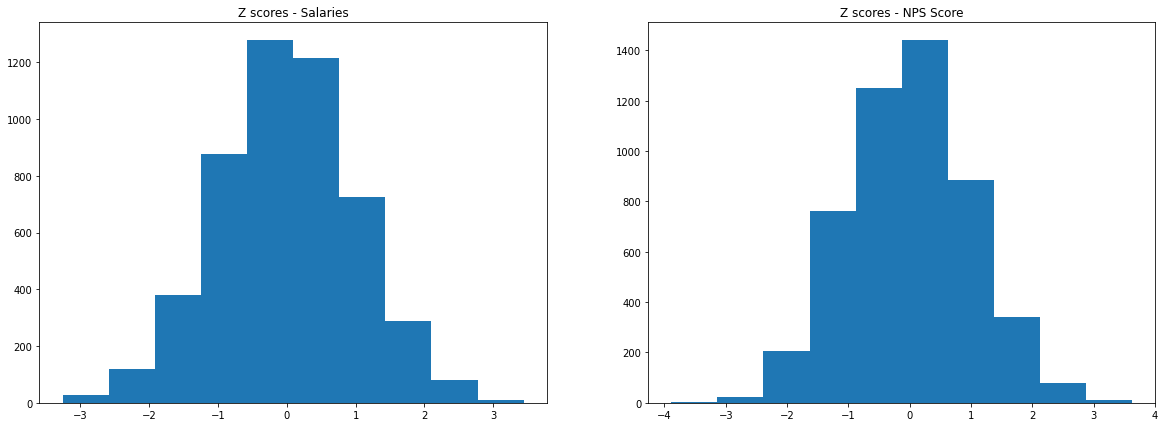

In [13]:
# plot for zscores for salaries and NPS Score data goes here
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
ax1.hist(df2['salaries_zscores'])
ax2.hist(df2['NPS Score_zscores'])
ax1.set_title('Z scores - Salaries')
ax2.set_title('Z scores - NPS Score')
plt.show()

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [14]:
def create_pmf(arr):
    n = len(arr)
    d = {}
    for event in arr:
        d[event] = d.get(event,0) +1
    for k,v in d.items():
        d[k] = v/n
    return d

In [15]:
pmf = create_pmf(df2['eventOutcome'])

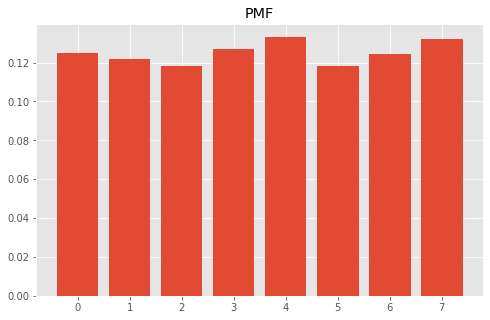

In [16]:
# Plot the pmf 
plt.style.use('ggplot')
plt.figure(figsize=(8,5))

plt.bar(pmf.keys(), pmf.values())
plt.title('PMF')
plt.show()


# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

# Level Up:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

* plot the pdf and cdf of a given distribution

In [10]:
# find salaries with zscores <= 2.0 

In [11]:
# calculate skewness and kurtosis of NPS Score column

# Plotting a pdf and cdf of a normal distribution
A survey is taken that finds that students send an mean average of 80 DMs a day with a standard deviation of 6 DMS. 

In [13]:
# plot the pdf and cdf of this normal distribution. level up if you can do it in subplots

In [14]:
# what is the probability of drawing a student that sends at least 82 DMs a day?

A second survey is taken at another bootcamp that shows that students send a mean average of
80 DMs a day, but they have a standard deviation of 9 DMS.  

In [15]:
# What is the difference in the probability of finding a student that sends, at most, 65 DMs a day? 

# run the cell below to convert your notebook to a README for assessment

In [17]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md

[NbConvertApp] Converting notebook assessment.ipynb to markdown
[NbConvertApp] Support files will be in assessment_files/
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Writing 13445 bytes to assessment.md
